In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from itertools import combinations

import ast
import re

pd.options.display.float_format = '{:.0f}'.format
np.set_printoptions(suppress=True)

In [2]:
users = pd.read_csv('users.csv')
tweets = pd.read_csv('tweets.csv')

In [3]:
retweets = tweets.dropna(subset=['retweeted_status_id'])

In [4]:
retweets = retweets.merge(
    tweets[['tweet_id', 'user_id']],
    left_on='retweeted_status_id',
    right_on='tweet_id',
    how='inner',
    suffixes=('', '_original')
)


In [5]:
retweets

user_id         user_key    created_at          created_str  \
0    4208754922   missourinewsus 1472251419000  2016-08-26 22:43:39   
1    4311371968         rightnpr 1473278309000  2016-09-07 19:58:29   
2    3990577513       tpartynews 1474066747000  2016-09-16 22:59:07   
3    1690487623     michellearry 1455878644000  2016-02-19 10:44:04   
4    2532611755        kathiemrr 1487175024000  2017-02-15 16:10:24   
...         ...              ...           ...                  ...   
2623 1623180199   jeffreykahunas 1471621929000  2016-08-19 15:52:09   
2624 3312143142         gloed_up 1473001963000  2016-09-04 15:12:43   
2625 2589353987     cassieweltch 1471448496000  2016-08-17 15:41:36   
2626 2589353987     cassieweltch 1469892276000  2016-07-30 15:24:36   
2627 1656685598  jeannemccarthy0 1455010129000  2016-02-09 09:28:49   

      retweet_count retweeted  favorite_count  \
0                 0     False               0   
1                 0     False               0   
2                 0     False               0   
3               NaN       NaN             NaN   
4               NaN       NaN             NaN   
...             ...       ...             ...   
2623              0     False               0   
2624              0     False               0   
2625              0     False               0   
2626            NaN       NaN             NaN   
2627            NaN       NaN             NaN   

                                                   text           tweet_id  \
0     RT @Pamela_Moore13: People starting to wake up... 769304327345303552   
1     RT @tpartynews: 💥💥💥Trump raises $5 mil in smal... 773611416347611136   
2     RT @TEN_GOP: Trump in #Miami: "Take Guns from ... 776918367022317568   
3     RT @jstines3: TED CRUZ: CONSTITUTION as law, S... 700631933680635904   
4     RT @8Flibble: #HowToLoseYourJob\r\nGet drunk a... 831898462878912512   
...                                                 ...                ...   
2623  RT @MarissaImStrong: She lies everytime! I'm s... 766664055289372672   
2624  RT @BleepThePolice: She would be exellent POTU... 772452337012973568   
2625  RT @DanaGeezus: #TrumpsFavoriteHeadline Obama ... 765936623724929024   
2626  RT @HeyHeyMissJ: #IHatePokemonGoBecause I like... 759409364134424576   
2627  RT @2ANow: When your Smiling the Whole World S... 696989116760772608   

                                                 source  \
0     <a href="http://twitter.com" rel="nofollow">Tw...   
1     <a href="https://about.twitter.com/products/tw...   
2     <a href="https://about.twitter.com/products/tw...   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
2623  <a href="http://twitter.com" rel="nofollow">Tw...   
2624  <a href="http://twitter.com" rel="nofollow">Tw...   
2625  <a href="http://twitter.com" rel="nofollow">Tw...   
2626                                                NaN   
2627                                                NaN   

                                               hashtags  \
0                                             ["Miami"]   
1                                                    []   
2                   ["Miami","TrumpRally","birtherism"]   
3                                                    []   
4                                                    []   
...                                                 ...   
2623  ["ReleaseClintonsMedicalRecords","CrookedHilla...   
2624     ["HappyBirthdayBeyonce","BeyonceForPresident"]   
2625                         ["TrumpsFavoriteHeadline"]   
2626                          ["IHatePokemonGoBecause"]   
2627                                             ["2A"]   

                                          expanded_urls  posted  \
0                                                    []  POSTED   
1                                                    []  POSTED   
2         

In [6]:
import networkx as nx

G = nx.DiGraph()
edges = retweets[['user_id', 'user_id_original']].values
G.add_edges_from(edges)


In [7]:
G.nodes

NodeView((np.float64(4208754922.0), np.float64(4272870988.0), np.float64(4311371968.0), np.float64(3990577513.0), np.float64(4224729994.0), np.float64(1690487623.0), np.float64(1710804738.0), np.float64(2532611755.0), np.float64(2496599688.0), np.float64(2620869737.0), np.float64(2533001646.0), np.float64(2541945841.0), np.float64(1727482238.0), np.float64(2589353987.0), np.float64(1679279490.0), np.float64(4224912857.0), np.float64(2573225349.0), np.float64(2882013788.0), np.float64(2584152521.0), np.float64(2572058134.0), np.float64(1623180199.0), np.float64(1671234620.0), np.float64(2587100717.0), np.float64(1833223908.0), np.float64(2882350436.0), np.float64(4332740714.0), np.float64(3312143142.0), np.float64(2536146374.0), np.float64(1676481360.0), np.float64(1657694515.0), np.float64(1650310652.0), np.float64(1649967228.0), np.float64(2671070290.0), np.float64(2533221819.0), np.float64(4355797094.0), np.float64(4840551713.0), np.float64(2531159968.0), np.float64(1660771422.0), np

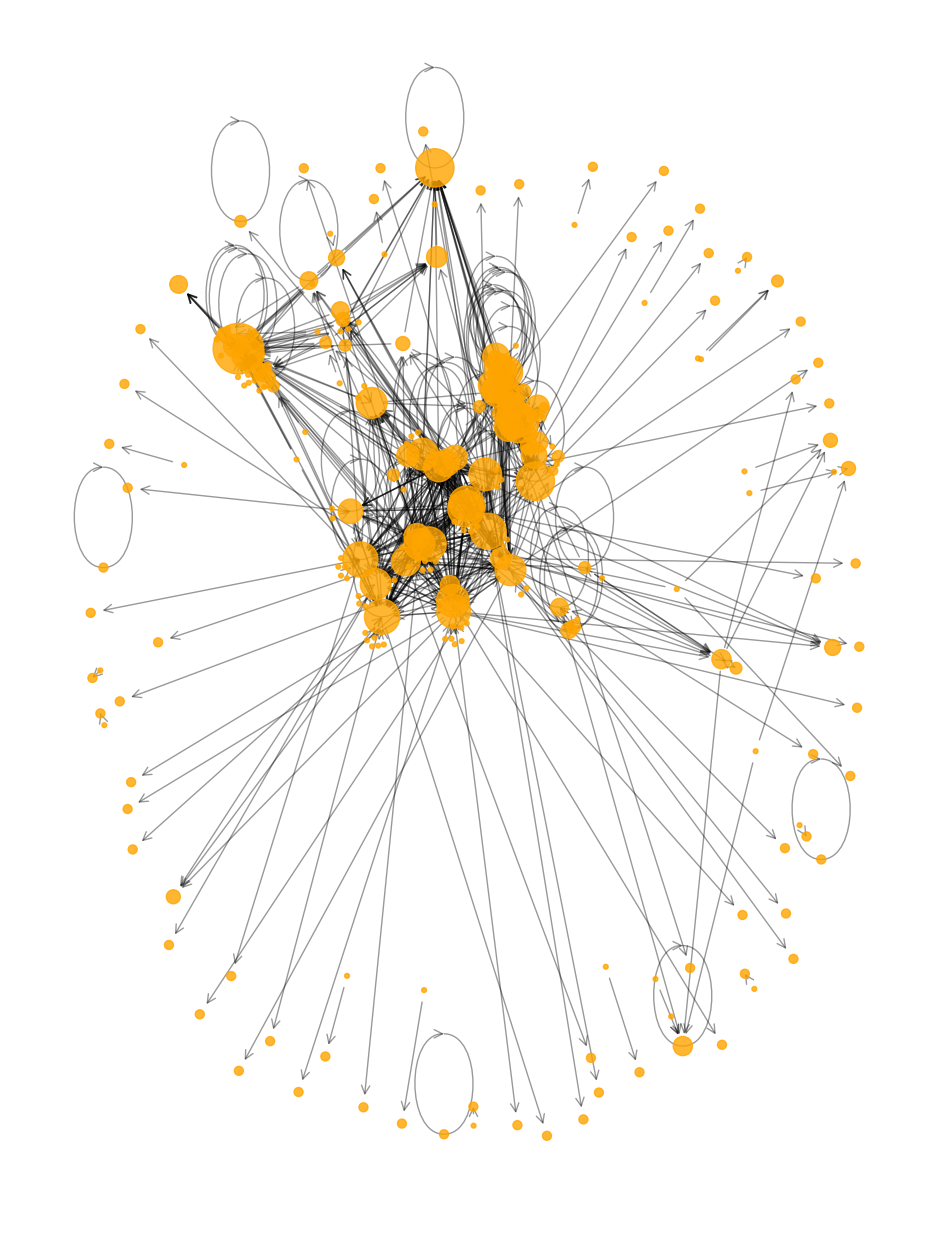

In [8]:
degrees = dict(G.in_degree())
node_sizes = [(degrees[n]+0.4) * 30 for n in G.nodes()]
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(12, 16))
pos = nx.spring_layout(G, seed=42)

# nodes
nx.draw_networkx_nodes(
    G,
    pos,
    node_size=node_sizes,
    node_color='orange',
    alpha=0.8
)

# edges + strzałki
nx.draw_networkx_edges(
    G,
    pos,
    arrows=True,
    arrowstyle='->',
    arrowsize=15,
    alpha=0.4
)

plt.axis('off')
plt.show()


In [9]:
import community as community_louvain

G_undirected = G.to_undirected()
partition = community_louvain.best_partition(G_undirected , random_state= 42, resolution=0.1)

In [10]:
communities_df = (
    pd.DataFrame.from_dict(partition, orient='index', columns=['community'])
      .reset_index()
      .rename(columns={'index': 'user_id'})
)


In [11]:
communities_df

user_id  community
0   4208754922          1
1   4272870988         23
2   4311371968         34
3   3990577513         34
4   4224729994          4
..         ...        ...
262        NaN          3
263        NaN          9
264        NaN          9
265        NaN         56
266 1685173321         10

[267 rows x 2 columns]

In [12]:
communities_df
top3_comm = communities_df.groupby(['community']).count().sort_values(by = 'user_id', ascending= False)[:3]

In [13]:
nodes_top = (
    communities_df
    .loc[communities_df['community'].isin(top3_comm.index), 'user_id']
    .dropna()
    .tolist()
)
nodes_top_series = pd.Series(nodes_top)

nodes_top_series.name = 'user_id'
nodes_top_series.head()

0   4272870988
1   4224729994
2   2532611755
3   2496599688
4   2533001646
Name: user_id, dtype: float64

In [14]:
merged_df = pd.merge(left=nodes_top_series.to_frame(), right=communities_df, how='inner')

merged_df


user_id  community
0  4272870988         23
1  4224729994          4
2  2532611755          8
3  2496599688          8
4  2533001646          8
5  2541945841          8
6  1727482238          8
7  2589353987          8
8  2882013788          8
9  2584152521          8
10 2572058134         23
11 1623180199         23
12 1671234620         23
13 2587100717         23
14 1833223908         23
15 1676481360         23
16 1657694515          8
17 2671070290         23
18 2533221819         23
19 2531159968          8
20 1660771422         23
21 1868981054         23
22 2540758755         23
23 1646999972         23
24 1658202894         23
25 2882037326          8
26 1656685598         23
27 4508630900          8
28 1694026190         23
29 3084088366         23
30 2590038478         23
31 1651693646         23
32 1649144358         23
33 2514979491          4
34 2491081213         23
35 1882324014         23
36 1669574551         23
37 1659753702          4
38 2586491520          4
39 1621376306          4
40 2534421182          8
41 1720117201          4
42 1654695517          4
43 1678552327          4
44 1623062953          4
45 2559217373          4
46 1688003786          4
47 1532863891          8
48 2563274242          4
49 2388391757          4
50 2528293132          4

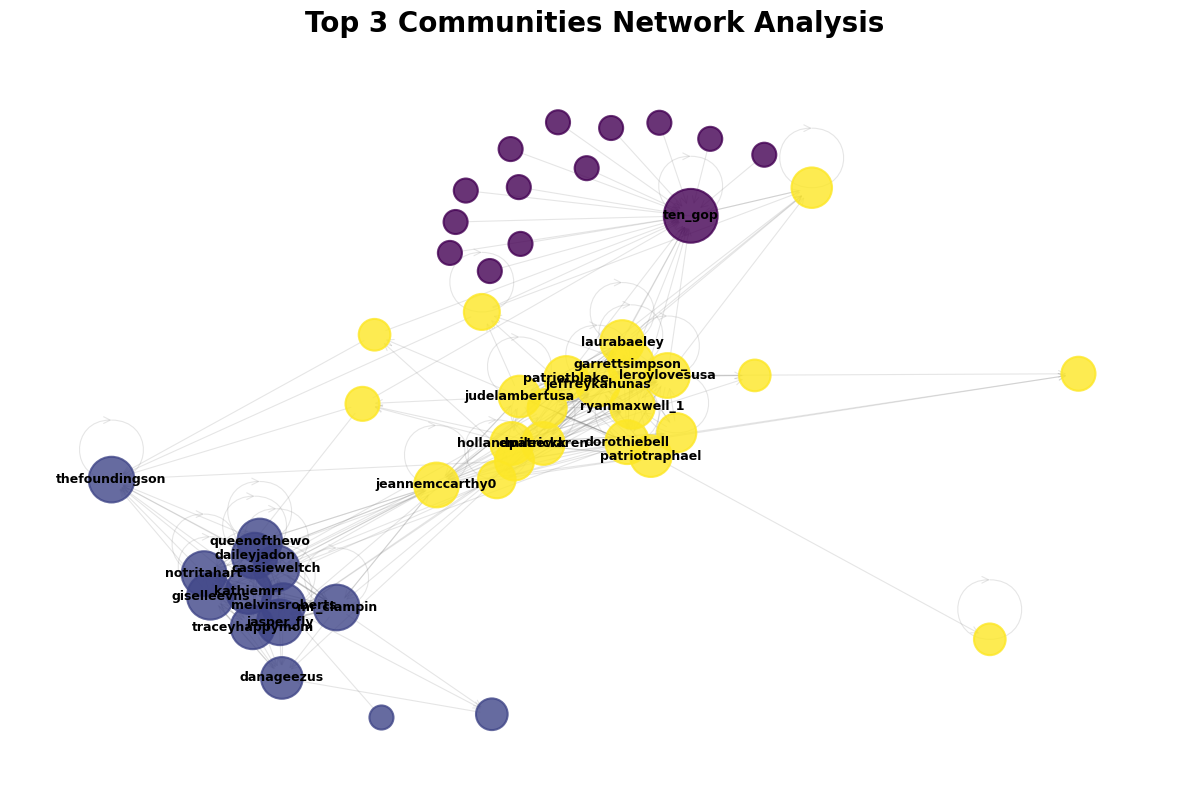

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


user_to_community = dict(zip(merged_df['user_id'], merged_df['community']))
community_counts = Counter(merged_df['community'])
top_3_communities = [com for com, _ in community_counts.most_common(3)]
top_nodes_set = set(merged_df[merged_df['community'].isin(top_3_communities)]['user_id'])


H = G.subgraph([n for n in G.nodes() if n in top_nodes_set]).copy()


degrees = dict(H.in_degree())
node_sizes = [np.sqrt(degrees[n] + 1) * 300 for n in H.nodes()]

community_map = ['green','red','blue']
node_colors = [user_to_community.get(n, -1) for n in H.nodes()]


angles = np.linspace(0, 2 * np.pi, len(top_3_communities), endpoint=False)
community_centers = {com: np.array([10 * np.cos(a), 10 * np.sin(a)]) 
                     for com, a in zip(top_3_communities, angles)}

pos_initial = {}
for n in H.nodes():
    com = user_to_community[n]
    # Środek społeczności + mały losowy szum
    pos_initial[n] = community_centers[com] + np.random.normal(scale=2, size=2)
pos = nx.spring_layout(H, pos=pos_initial, fixed=None, k=8, iterations=40, seed=42)

plt.figure(figsize=(12, 8)) 

# Nodes and edges
nx.draw_networkx_edges(
    H, pos,
    arrowstyle='->', 
    arrowsize=12,
    edge_color='gray',
    alpha=0.2, 
    width=0.8
)

nodes = nx.draw_networkx_nodes(
    H, pos,
    node_size=node_sizes,
    node_color=node_colors,
    alpha=0.8,
    linewidths=1.5
)

id_to_name = dict(zip(tweets['user_id'], tweets['user_key']))

for n, (x, y) in pos.items():
    deg = degrees[n]
    if deg > np.percentile(list(degrees.values()), 50): 
        plt.text(
            x, y, 
            id_to_name.get(n, n),
            fontsize=9,
            fontweight='bold',
            ha='center',
            va='center'
        )

plt.title('Top 3 Communities Network Analysis', fontsize=20, fontweight='bold', pad=20)
plt.axis('off')


plt.tight_layout()
plt.show()


In [16]:
#Time analysis
user_to_community

{4272870988.0: 23,
 4224729994.0: 4,
 2532611755.0: 8,
 2496599688.0: 8,
 2533001646.0: 8,
 2541945841.0: 8,
 1727482238.0: 8,
 2589353987.0: 8,
 2882013788.0: 8,
 2584152521.0: 8,
 2572058134.0: 23,
 1623180199.0: 23,
 1671234620.0: 23,
 2587100717.0: 23,
 1833223908.0: 23,
 1676481360.0: 23,
 1657694515.0: 8,
 2671070290.0: 23,
 2533221819.0: 23,
 2531159968.0: 8,
 1660771422.0: 23,
 1868981054.0: 23,
 2540758755.0: 23,
 1646999972.0: 23,
 1658202894.0: 23,
 2882037326.0: 8,
 1656685598.0: 23,
 4508630900.0: 8,
 1694026190.0: 23,
 3084088366.0: 23,
 2590038478.0: 23,
 1651693646.0: 23,
 1649144358.0: 23,
 2514979491.0: 4,
 2491081213.0: 23,
 1882324014.0: 23,
 1669574551.0: 23,
 1659753702.0: 4,
 2586491520.0: 4,
 1621376306.0: 4,
 2534421182.0: 8,
 1720117201.0: 4,
 1654695517.0: 4,
 1678552327.0: 4,
 1623062953.0: 4,
 2559217373.0: 4,
 1688003786.0: 4,
 1532863891.0: 8,
 2563274242.0: 4,
 2388391757.0: 4,
 2528293132.0: 4}

In [17]:
user_ids_community_4 = [user_id for user_id, com in user_to_community.items() if com == 4]
user_ids_community_8 = [user_id for user_id, com in user_to_community.items() if com == 8]
user_ids_community_23 = [user_id for user_id, com in user_to_community.items() if com == 23]


In [18]:
retweets23 = retweets[
    (retweets['user_id_original'].isin(user_ids_community_23)) &
    (retweets['user_id'].isin(user_ids_community_23))
]
retweets8 = retweets[
    (retweets['user_id_original'].isin(user_ids_community_8)) &
    (retweets['user_id'].isin(user_ids_community_8))
]
retweets4 = retweets[
    (retweets['user_id_original'].isin(user_ids_community_4)) &
    (retweets['user_id'].isin(user_ids_community_4))
]

In [19]:
retweets23

user_id         user_key    created_at          created_str  \
17   2572058134    leroylovesusa 1457806990000  2016-03-12 18:23:10   
18   2572058134    leroylovesusa 1457806990000  2016-03-12 18:23:10   
20   2587100717   judelambertusa 1464642180000  2016-05-30 21:03:00   
37   1676481360      emileewaren 1459097842000  2016-03-27 16:57:22   
48   2572058134    leroylovesusa 1464643925000  2016-05-30 21:32:05   
...         ...              ...           ...                  ...   
2599 3084088366   priceforpierce 1474940240000  2016-09-27 01:37:20   
2602 1694026190  jacquelinisbest 1469807784000  2016-07-29 15:56:24   
2604 1671234620          hyddrox 1474317322000  2016-09-19 20:35:22   
2620 1660771422  garrettsimpson_ 1457806494000  2016-03-12 18:14:54   
2627 1656685598  jeannemccarthy0 1455010129000  2016-02-09 09:28:49   

      retweet_count retweeted  favorite_count  \
17              NaN       NaN             NaN   
18              NaN       NaN             NaN   
20              NaN       NaN             NaN   
37              NaN       NaN             NaN   
48              NaN       NaN             NaN   
...             ...       ...             ...   
2599            NaN       NaN             NaN   
2602            NaN       NaN             NaN   
2604              0     False               0   
2620            NaN       NaN             NaN   
2627            NaN       NaN             NaN   

                                                   text           tweet_id  \
17    RT @hyddrox: We need freedom of speech and not... 708720000450871296   
18    RT @hyddrox: We need freedom of speech and not... 708720000450871296   
20    RT @DorothieBell: Thank you to every veteran a... 737388867427393536   
37    RT @erinkellyd: MT @jstines3: Dear LORD, pleas... 714134227059548160   
48    RT @DorothieBell: Thank you to every veteran a... 737396185862922240   
...                                                 ...                ...   
2599  RT @JudeLambertUSA: #ThingsMoreTrustedThanHill... 780582059081211904   
2602  RT @PatriotBlake: I just published “The End of... 759054979445379072   
2604  RT @Pamela_Moore13: "Donald Trump will show 0 ... 777969352410796032   
2620      RT @DorothieBell: Say #NoCyberCensorship! 🚫⛔️ 708717920327766016   
2627  RT @2ANow: When your Smiling the Whole World S... 696989116760772608   

                                                 source  \
17                                                  NaN   
18                                                  NaN   
20                                                  NaN   
37                                                  NaN   
48                                                  NaN   
...                                                 ...   
2599                                                NaN   
2602                                                NaN   
2604  <a href="http://twitter.com" rel="nofollow">Tw...   
2620                                                NaN   
2627                                                NaN   

                              hashtags expanded_urls  posted  \
17               ["NoCyberCensorship"]            []  POSTED   
18               ["NoCyberCensorship"]            []  POSTED   
20                       ["InHonorOf"]            []  POSTED   
37                                  []            []  POSTED   
48                       ["InHonorOf"]            []  POSTED   
...                                ...           ...     ...   
2599  ["ThingsMoreTrustedThanHillary"]            []  POSTED   
2602                                []            []  POSTED   
2604                                []            []  POSTED   
2620             ["NoCyberCensorship"]            []  POSTED   
2627                            ["2A"]            []  POSTED   

                mentions  retweeted_status_id  in_reply_to_status_id  \
17                    []   708694574374453248                    NaN   
18     

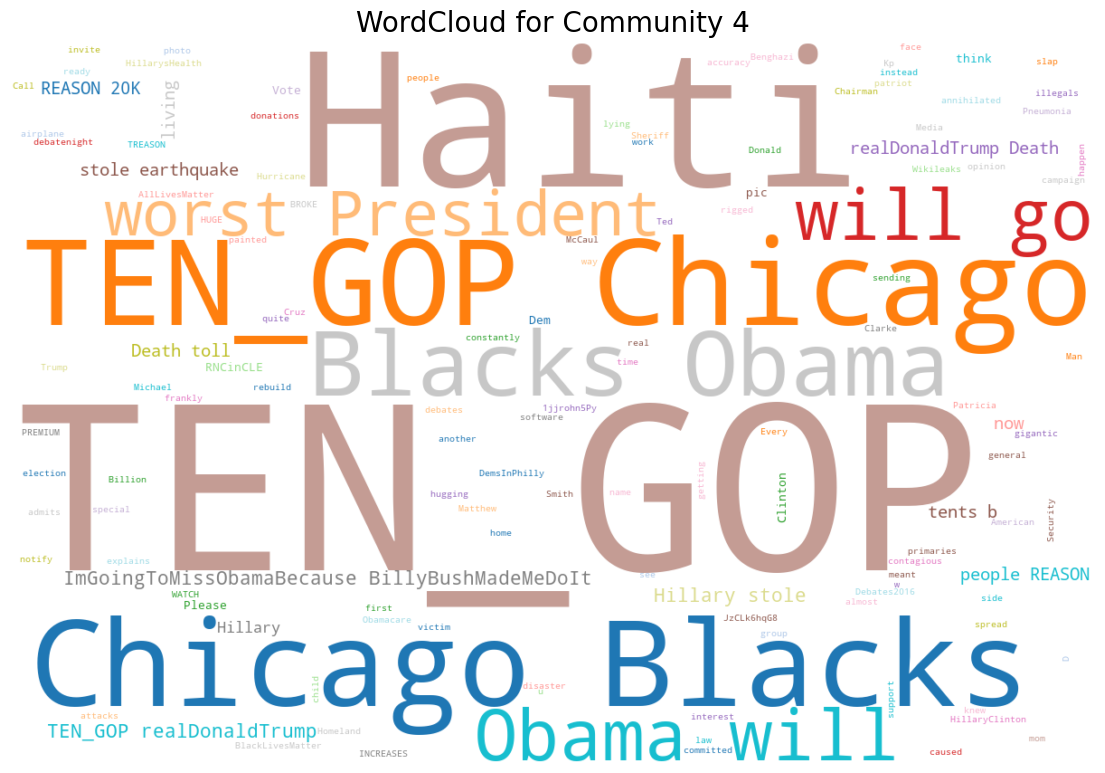

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(retweets4['text'].astype(str))

stopwords = set(WordCloud().stopwords)
stopwords.update(["https", "co", "RT", "amp","c","p","t"])

wordcloud = WordCloud( stopwords=stopwords,
    width=1200,
    height=800,
    background_color='white',
    colormap='tab20',  
    max_words=200
).generate(text)



plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Community 4', fontsize=20)
plt.show()


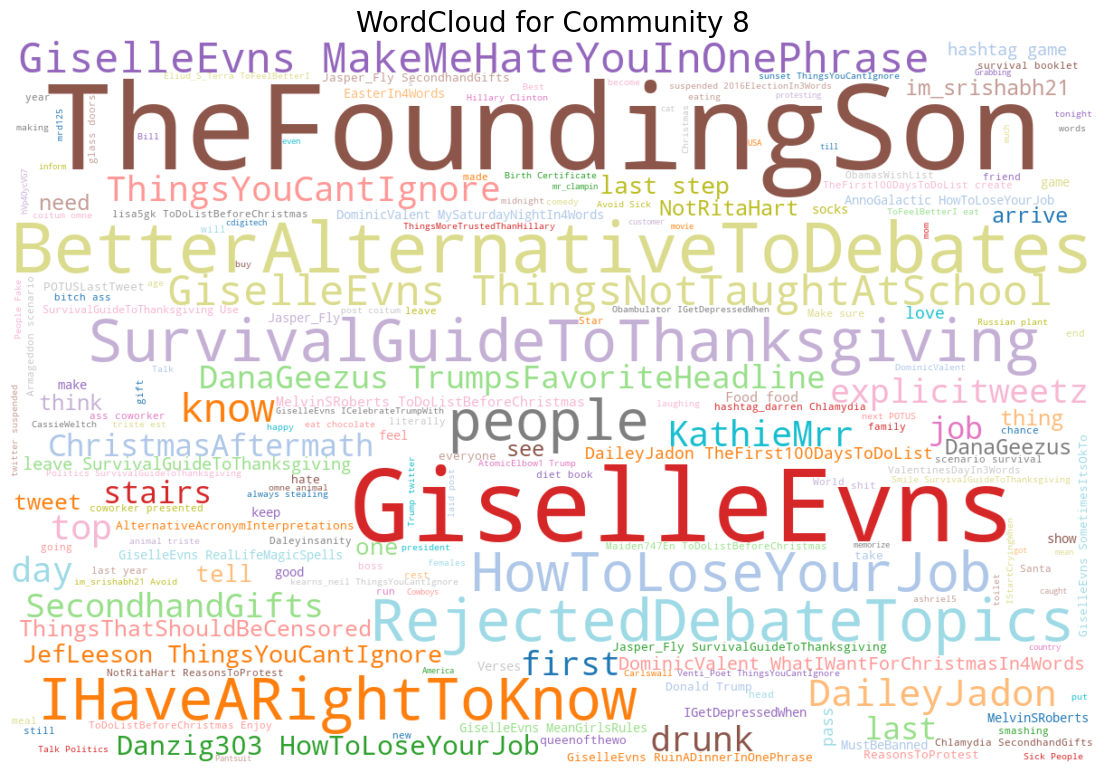

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(retweets8['text'].astype(str))

wordcloud = WordCloud(stopwords=stopwords,
    width=1200,
    height=800,
    background_color='white',
    colormap='tab20',  
    max_words=200
).generate(text)

plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Community 8', fontsize=20)
plt.show()


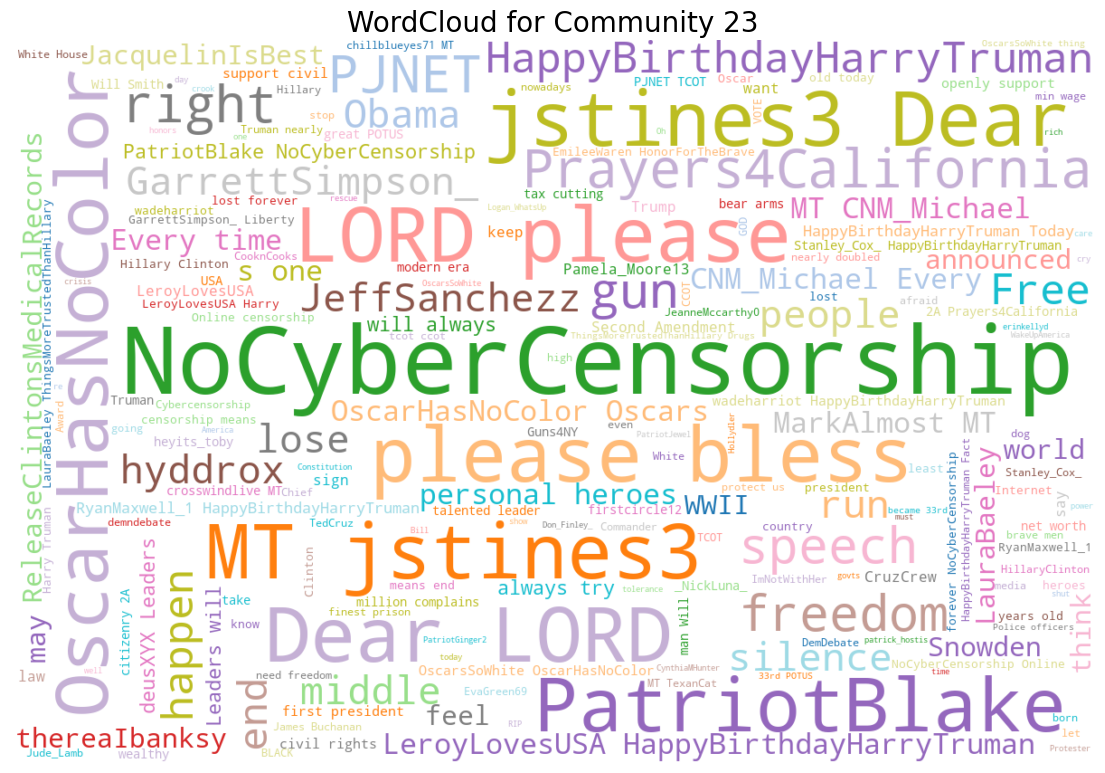

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(retweets23['text'].astype(str))

wordcloud = WordCloud(stopwords=stopwords,
    width=1200,
    height=800,
    background_color='white',
    colormap='tab20',  
    max_words=200
).generate(text)

plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Community 23', fontsize=20)
plt.show()


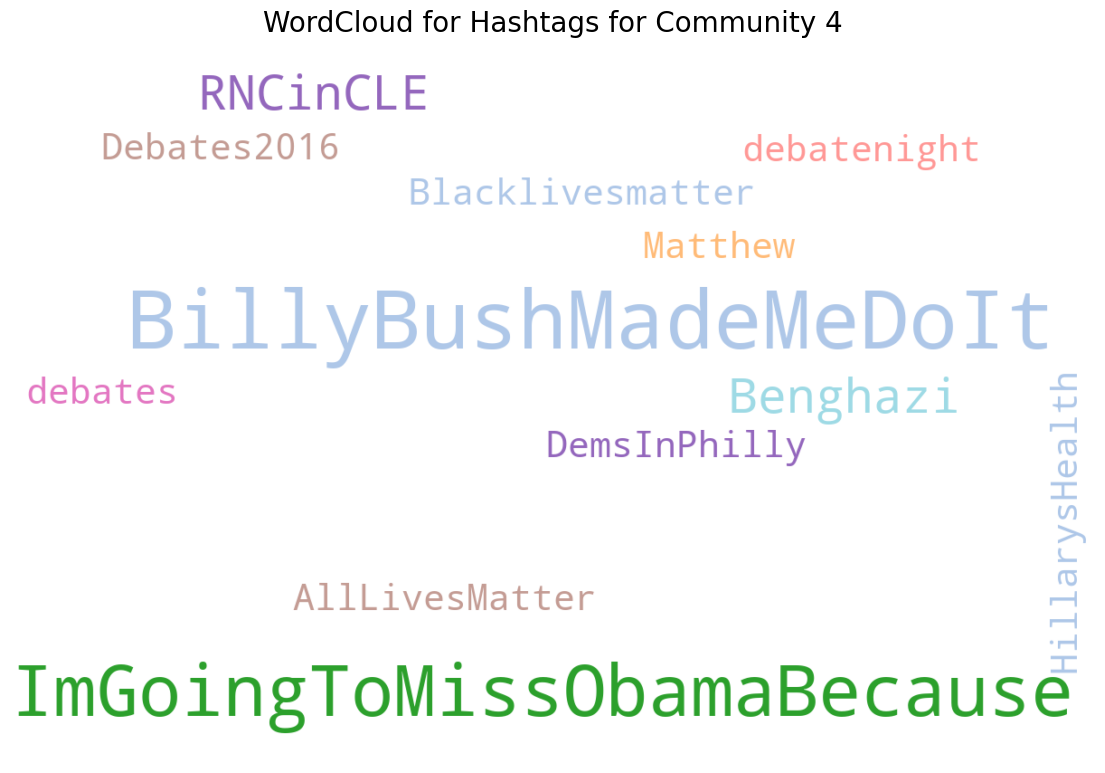

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(retweets4['hashtags'].astype(str))

stopwords = set(WordCloud().stopwords)
stopwords.update(["https", "co", "RT", "amp","c","p","t"])

wordcloud = WordCloud( stopwords=stopwords,
    width=1200,
    height=800,
    background_color='white',
    colormap='tab20',  
    max_words=200
).generate(text)



plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Hashtags for Community 4', fontsize=20)
plt.show()

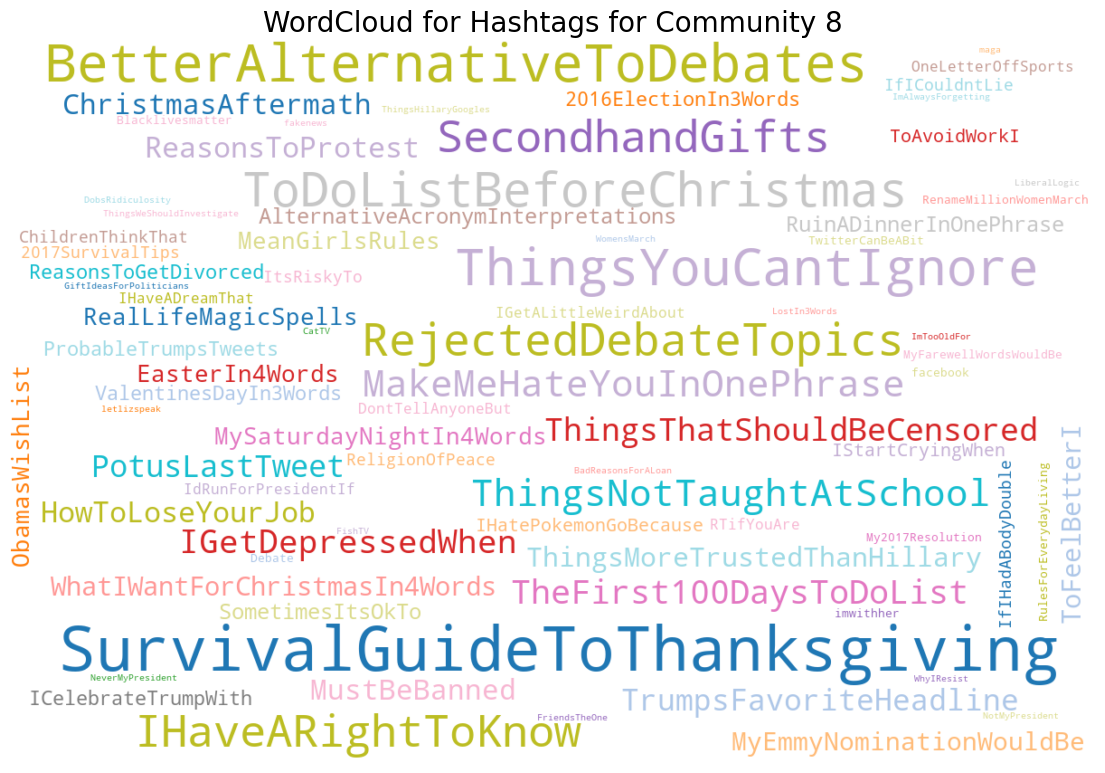

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(retweets8['hashtags'].astype(str))

stopwords = set(WordCloud().stopwords)
stopwords.update(["https", "co", "RT", "amp","c","p","t"])

wordcloud = WordCloud( stopwords=stopwords,
    width=1200,
    height=800,
    background_color='white',
    colormap='tab20',  
    max_words=200
).generate(text)



plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Hashtags for Community 8', fontsize=20)
plt.show()

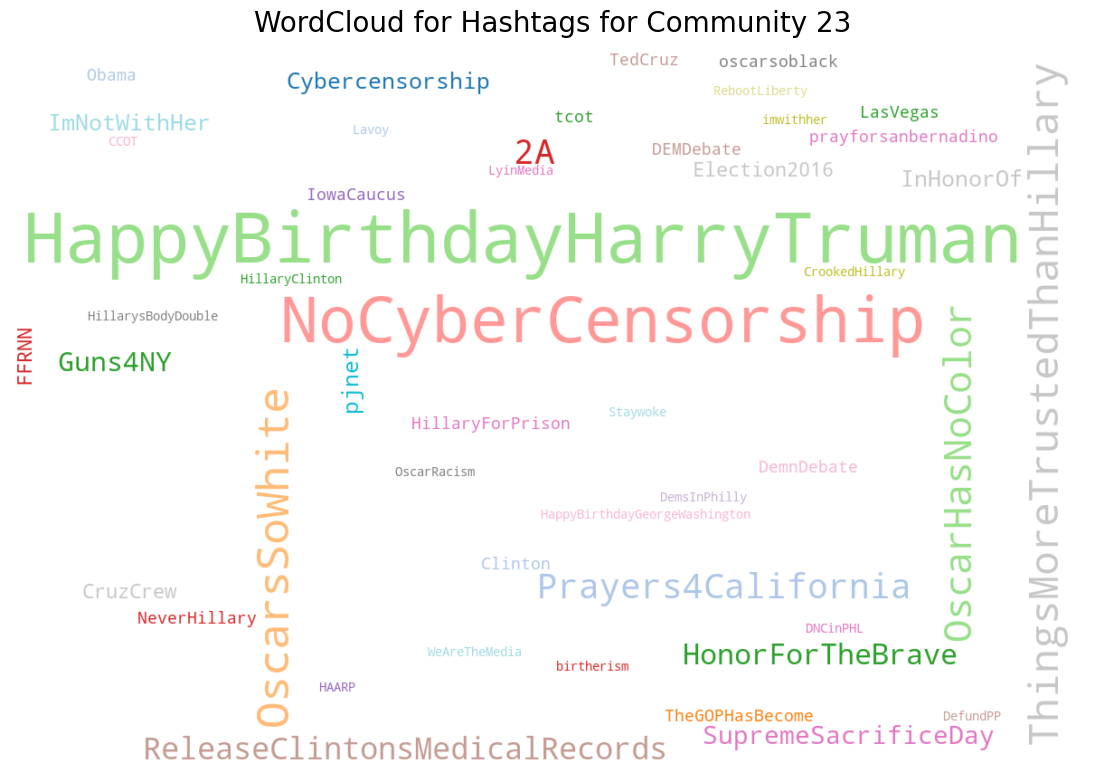

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(retweets23['hashtags'].astype(str))

stopwords = set(WordCloud().stopwords)
stopwords.update(["https", "co", "RT", "amp","c","p","t"])

wordcloud = WordCloud( stopwords=stopwords,
    width=1200,
    height=800,
    background_color='white',
    colormap='tab20',  
    max_words=200
).generate(text)



plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Hashtags for Community 23', fontsize=20)
plt.show()

In [26]:
tweets

user_id         user_key    created_at          created_str  \
0              2532611755        kathiemrr 1488207240000  2017-02-27 14:54:00   
1              2531159968   traceyhappymom 1471272620000  2016-08-15 14:50:20   
2                     NaN    evewebster373 1435701369000  2015-06-30 21:56:09   
3              4840551713      blacktolive 1474013088000  2016-09-16 08:04:48   
4              1694026190  jacquelinisbest 1474227985000  2016-09-18 19:46:25   
...                   ...              ...           ...                  ...   
203446         1710804738       cookncooks 1480734977000  2016-12-03 03:16:17   
203447         2928870434    newspeakdaily 1475278751000  2016-09-30 23:39:11   
203448         2951556370    specialaffair 1473072309000  2016-09-05 10:45:09   
203449         2671070290     patriotblake 1486384574000  2017-02-06 12:36:14   
203450 750367533660774400  sternandreas404 1499417212000  2017-07-07 08:46:52   

        retweet_count retweeted  favorite_count  \
0                 NaN       NaN             NaN   
1                 NaN       NaN             NaN   
2                 NaN       NaN             NaN   
3                  18     False              17   
4                   0     False               0   
...               ...       ...             ...   
203446            NaN       NaN             NaN   
203447              0     False               0   
203448              0     False               0   
203449            NaN       NaN             NaN   
203450            NaN       NaN             NaN   

                                                     text           tweet_id  \
0         #ThingsDoneByMistake kissing auntie in the lips 836227891897651200   
1       RT @mc_derpin: #TheOlderWeGet the more pessimi... 765198948239810560   
2       RT @dmataconis: Ready To Feel Like A Failure? ... 616002306572746752   
3         Amen! #blacklivesmatter https://t.co/wGffaOqgzl 776693302926147584   
4       RT @NahBabyNah: Twitchy: Chuck Todd caught out... 777594647875059712   
...                                                   ...                ...   
203446  RT @FairyTale_360: 6) Rexnord Bearings is set ... 804886948712157184   
203447  Will Trump’s Bad Week Hurt the GOP’s Senate Pr... 782001880834592768   
203448  China blames United States, journalists for Ob... 772747389287268352   
203449  RT @bfraser747: 💥💥 #PresidentElectTrump \r\n\r... 828583075810525184   
203450  RT @Lohrheidestar: Der "Lila Finger" ist immer... 883245923052261376   

                                                   source  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3       <a href="http://twitter.com" rel="nofollow">Tw...   
4       <a href="http://twitter.com" rel="nofollow">Tw...   
...                                                   ...   
203446                                                NaN   
203447  <a href="http://twitterfeed.com" rel="nofollow...   
203448  <a href="http://twitterfeed.com" rel="nofollow...   
203449                                                NaN   
203450                                                NaN   

                       hashtags                                expanded_urls  \
0       ["ThingsDoneByMistake"]                                           []   
1             ["TheOlderWeGet"]                                           []   
2                            []                                           []   
3          ["Blacklivesmatter"]                                           []   
4             ["WakeUpAmerica"]  ["http://ln.is/twitchy.com/loriz-31/3yafU"]   
...                         ...                                          ...   
203446                       []                                           []   
203447             ["Politics"]                                           []   
203448            

In [34]:
from datetime import datetime

tweets['datetime'] = pd.to_datetime(tweets['created_at'], unit = 'ms')
tweets['date'] = tweets['datetime'].dt.date# jeśli chcesz w UTC:
#date_utc = datetime.utcfromtimestamp(timestamp)
#print(date_utc)  # np. 2024-12-31 00:00:00
#``
print(tweets)

                  user_id         user_key    created_at          created_str  \
0              2532611755        kathiemrr 1488207240000  2017-02-27 14:54:00   
1              2531159968   traceyhappymom 1471272620000  2016-08-15 14:50:20   
2                     NaN    evewebster373 1435701369000  2015-06-30 21:56:09   
3              4840551713      blacktolive 1474013088000  2016-09-16 08:04:48   
4              1694026190  jacquelinisbest 1474227985000  2016-09-18 19:46:25   
...                   ...              ...           ...                  ...   
203446         1710804738       cookncooks 1480734977000  2016-12-03 03:16:17   
203447         2928870434    newspeakdaily 1475278751000  2016-09-30 23:39:11   
203448         2951556370    specialaffair 1473072309000  2016-09-05 10:45:09   
203449         2671070290     patriotblake 1486384574000  2017-02-06 12:36:14   
203450 750367533660774400  sternandreas404 1499417212000  2017-07-07 08:46:52   

        retweet_count retwe

In [ ]:
merged_df = pd.merge(
    left=users,
    right=tweets,
    left_on='id',
    right_on='user_id',
    how='inner'
).dropna(subset=['id'])  


In [53]:
merged_df

id                       location              name  \
0               100345056  still ⬆️Block⤵️Corner⬇️street  #Ezekiel2517✨...   
1               100345056  still ⬆️Block⤵️Corner⬇️street  #Ezekiel2517✨...   
2               100345056  still ⬆️Block⤵️Corner⬇️street  #Ezekiel2517✨...   
3               100345056  still ⬆️Block⤵️Corner⬇️street  #Ezekiel2517✨...   
4               100345056  still ⬆️Block⤵️Corner⬇️street  #Ezekiel2517✨...   
...                   ...                            ...               ...   
195381 749931338573250560                            NaN     Maria Neuberg   
195382 749931338573250560                            NaN     Maria Neuberg   
195383 749931338573250560                            NaN     Maria Neuberg   
195384 749931338573250560                            NaN     Maria Neuberg   
195385 749931338573250560                            NaN     Maria Neuberg   

        followers_count  statuses_count time_zone verified lang  \
0                  1053           31858       NaN    False   en   
1                  1053           31858       NaN    False   en   
2                  1053           31858       NaN    False   en   
3                  1053           31858       NaN    False   en   
4                  1053           31858       NaN    False   en   
...                 ...             ...       ...      ...  ...   
195381                8              15      Bern    False   de   
195382                8              15      Bern    False   de   
195383                8              15      Bern    False   de   
195384                8              15      Bern    False   de   
195385                8              15      Bern    False   de   

          screen_name                                        description  ...  \
0         SCOTTGOHARD  CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...  ...   
1         SCOTTGOHARD  CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...  ...   
2         SCOTTGOHARD  CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...  ...   
3         SCOTTGOHARD  CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...  ...   
4         SCOTTGOHARD  CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...  ...   
...               ...                                                ...  ...   
195381  MariaNeuberg1                                                NaN  ...   
195382  MariaNeuberg1                                                NaN  ...   
195383  MariaNeuberg1                                                NaN  ...   
195384  MariaNeuberg1                                                NaN  ...   
195385  MariaNeuberg1                                                NaN  ...   

                 tweet_id                                             source  \
0      777710296349700096  <a href="http://twitter.com/download/iphone" r...   
1      795781762987200512  <a href="http://twitter.com/download/iphone" r...   
2      763488090715545600  <a href="http://twitter.com/download/iphone" r...   
3                     NaN                                                NaN   
4      763448921427439616  <a href="http://twitter.com/download/iphone" r...   
...                   ...                                                ...   
195381 756115690919198720                                                NaN   
195382 756100419512827904                                                NaN   
195383 756089658392580096                                                NaN   
195384 756116923373486080                                                NaN   
195385 839059037429907456                                                NaN   

                     hashtags  expanded_urls  posted             mentions  \
0                          []             []  POSTED  ["realdonaldtrump"]   
1                          []             []  POSTED  ["realdonaldtrump"]   
2                          []             []  POSTED  ["realdonaldtrump"]   
3                          []          

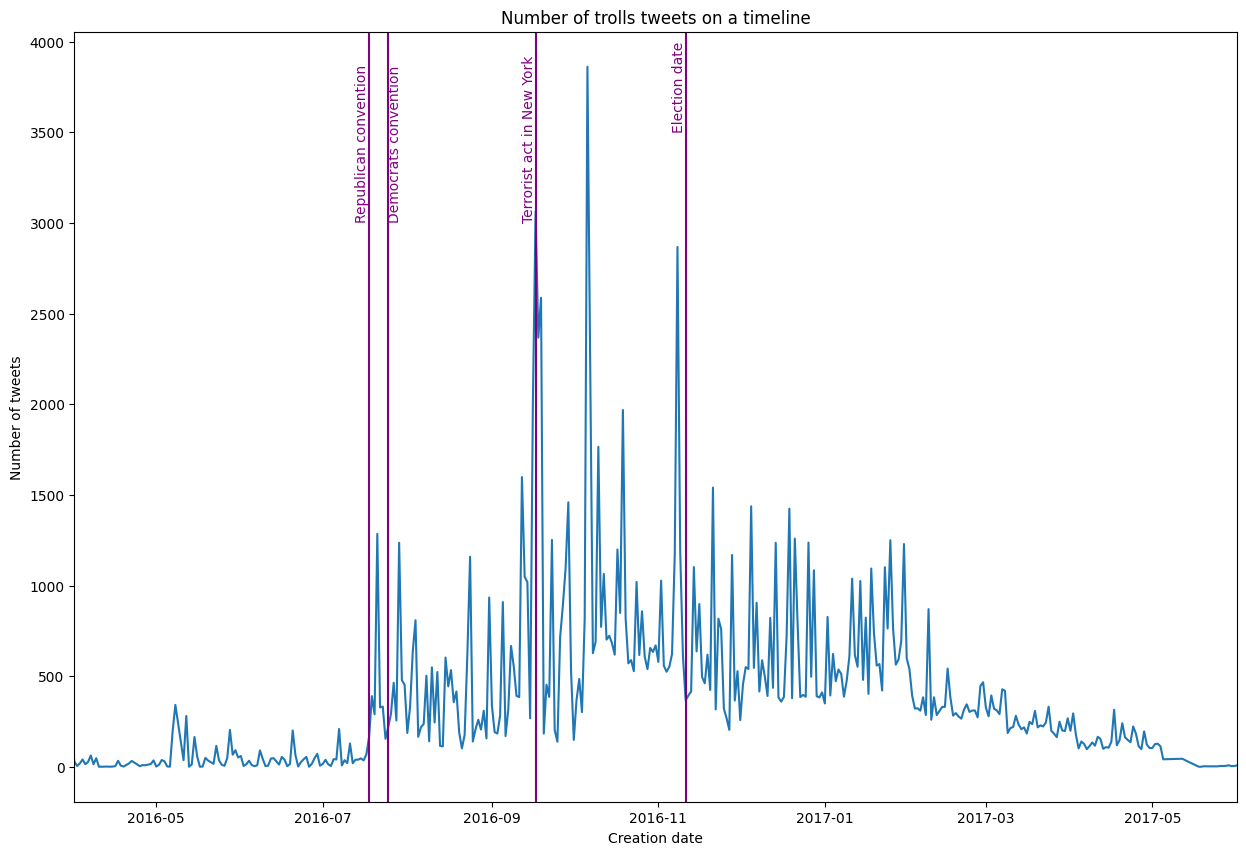

In [94]:
plt.figure(figsize = (15,10))

plt.title('Number of trolls tweets on a timeline')
plt.plot(merged_df.groupby('date').count()['datetime'])
plt.ylabel("Number of tweets")
plt.xlabel('Creation date')
plt.xlim(pd.to_datetime('2016-04-01'),pd.to_datetime('2017-06-01'))
plt.axvline(x=pd.to_datetime('2016-11-11'),  color = 'purple', label ='x')
plt.text(pd.to_datetime('2016-11-11'), 3500, 'Election date', rotation=90, color='purple', va='bottom', ha='right')

plt.axvline(x=pd.to_datetime('2016-07-18'),  color = 'purple', label ='x')
plt.text(pd.to_datetime('2016-07-18'), 3000, 'Republican convention', rotation=90, color='purple', va='bottom', ha='right')

plt.axvline(x=pd.to_datetime('2016-07-25'),  color = 'purple', label ='x')
plt.text(pd.to_datetime('2016-07-25'), 3000, 'Democrats convention', rotation=90, color='purple', va='bottom', ha='left')

plt.axvline(x=pd.to_datetime('2016-09-17'),  color = 'purple', label ='x')
plt.text(pd.to_datetime('2016-09-17'), 3000, 'Terrorist act in New York', rotation=90, color='purple', va='bottom', ha='right')

plt.show()


In [55]:
merged_df.groupby('date').count()['datetime'].sort_values()

date
2014-07-14       1
2014-11-29       1
2017-05-18       1
2017-05-19       1
2016-06-26       1
              ... 
2016-09-18    2367
2016-09-19    2587
2016-11-08    2867
2016-09-17    3063
2016-10-06    3861
Name: datetime, Length: 913, dtype: int64

In [106]:
merged_df.loc[merged_df['datetime'].dt.date == pd.to_datetime('2016-10-06').date()]['hashtags']


217                                               ["Foke"]
231                                               ["Foke"]
253                                                     []
259                                                     []
266                                                     []
                                ...                       
193484    ["Clinton","afdigital16","USwahl","USA","Trump"]
193508                                                  []
193518                                                  []
193533                                                  []
193572                                                  []
Name: hashtags, Length: 3861, dtype: object

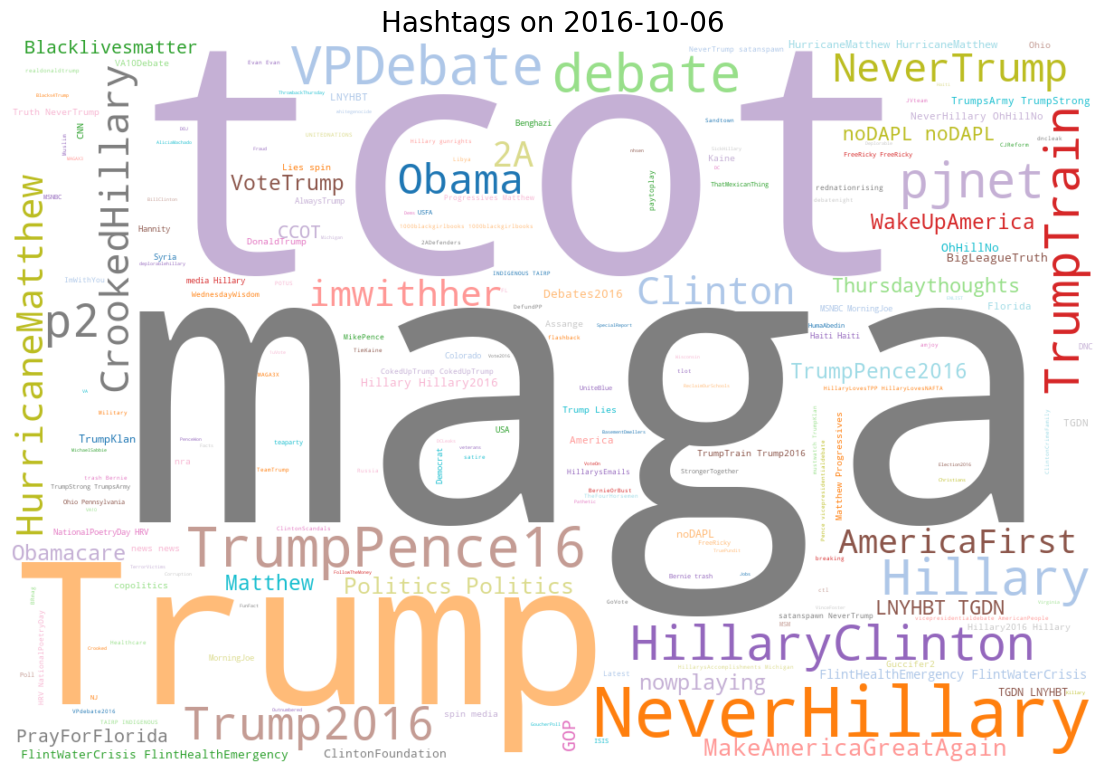

In [108]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(merged_df.loc[merged_df['datetime'].dt.date == pd.to_datetime('2016-10-06').date()]['hashtags'].astype(str))

stopwords = set(WordCloud().stopwords)
stopwords.update(["https", "co", "RT", "amp","c","p","t"])

wordcloud = WordCloud( stopwords=stopwords,
    width=1200,
    height=800,
    background_color='white',
    colormap='tab20',  
    max_words=200
).generate(text)



plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hashtags on 2016-10-06', fontsize=20)
plt.show()

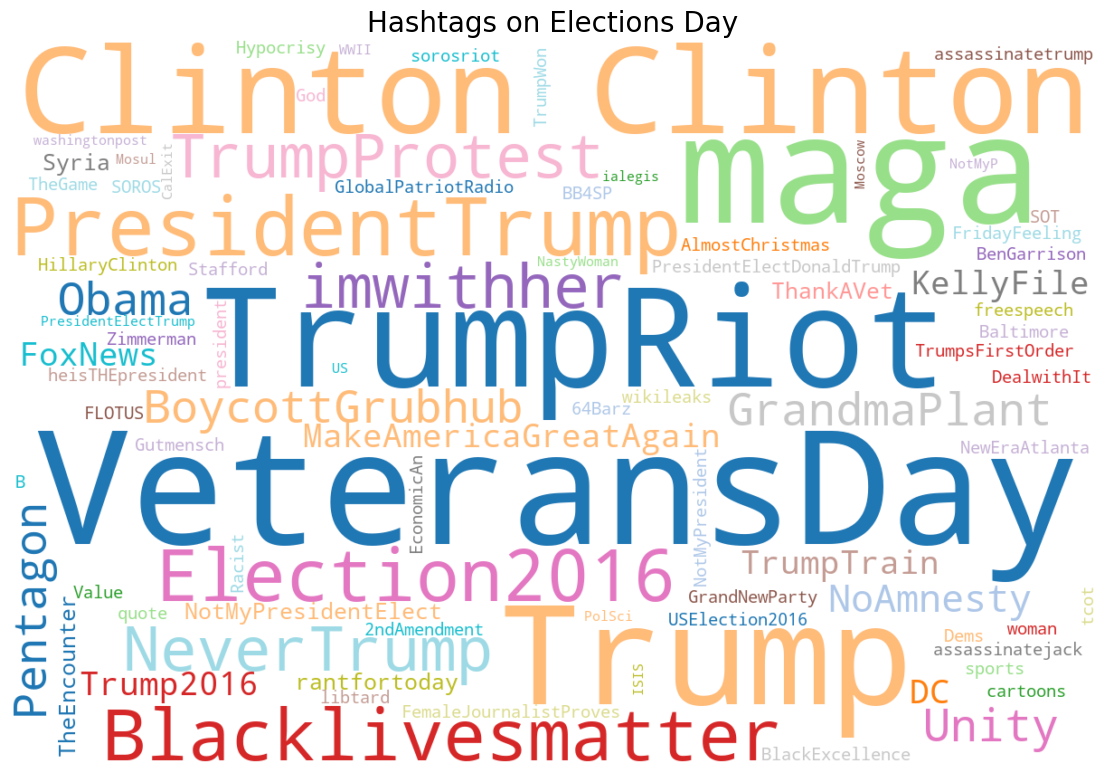

In [110]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(merged_df.loc[merged_df['datetime'].dt.date == pd.to_datetime('2016-11-11').date()]['hashtags'].astype(str))

stopwords = set(WordCloud().stopwords)
stopwords.update(["https", "co", "RT", "amp","c","p","t"])

wordcloud = WordCloud( stopwords=stopwords,
    width=1200,
    height=800,
    background_color='white',
    colormap='tab20',  
    max_words=200
).generate(text)



plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hashtags on Elections Day', fontsize=20)
plt.show()

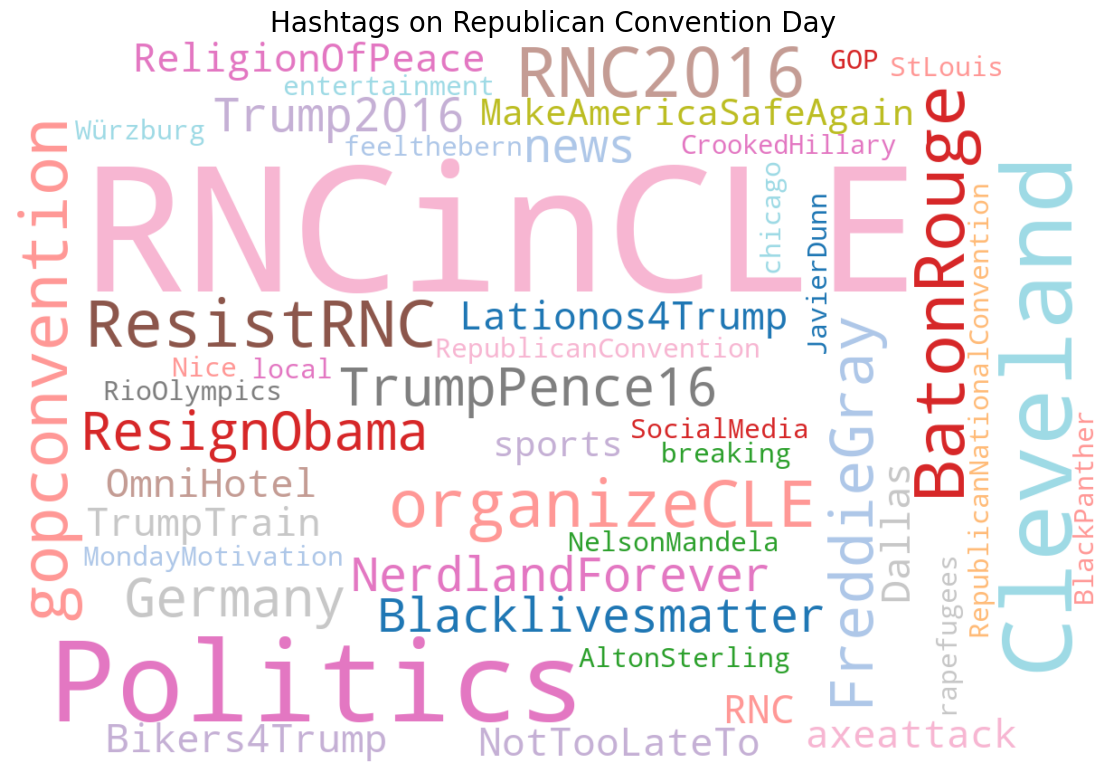

In [111]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(merged_df.loc[merged_df['datetime'].dt.date == pd.to_datetime('2016-07-18').date()]['hashtags'].astype(str))

stopwords = set(WordCloud().stopwords)
stopwords.update(["https", "co", "RT", "amp","c","p","t"])

wordcloud = WordCloud( stopwords=stopwords,
    width=1200,
    height=800,
    background_color='white',
    colormap='tab20',  
    max_words=200
).generate(text)



plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hashtags on Republican Convention Day', fontsize=20)
plt.show()

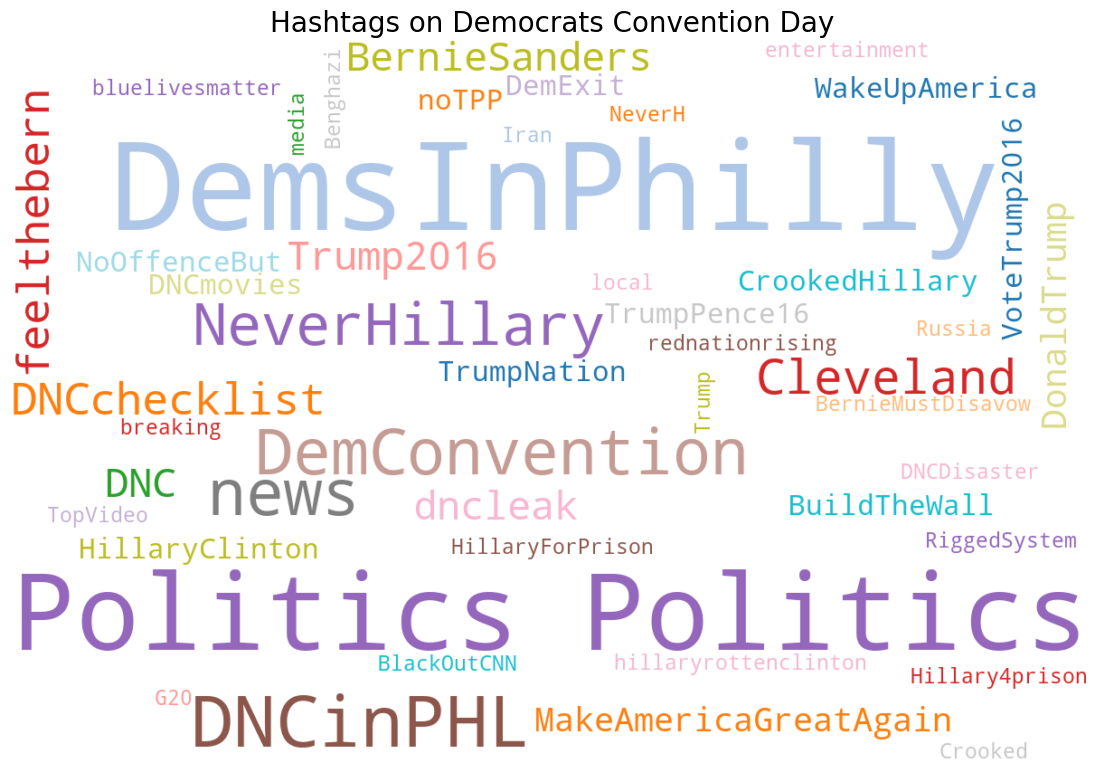

In [113]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(merged_df.loc[merged_df['datetime'].dt.date == pd.to_datetime('2016-07-25').date()]['hashtags'].astype(str))

stopwords = set(WordCloud().stopwords)
stopwords.update(["https", "co", "RT", "amp","c","p","t"])

wordcloud = WordCloud( stopwords=stopwords,
    width=1200,
    height=800,
    background_color='white',
    colormap='tab20',  
    max_words=200
).generate(text)



plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hashtags on Democrats Convention Day', fontsize=20)
plt.show()